## Dynamical range
Calculate the recall time for the following situations:
All of those calculus should be made for the **high G and really fast (small) tau_m**. First we will probe the limit where the inhibition is big to study the effects of both:

* Transition
* tau_z

Then we get to the point where I is not that big to prove the recall time for values of:
* self-excitation
* Inhibition
* tau_z
* Transition

In [2]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated

## An example for debugging beahviors below

In [14]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 0.5

G = 100.0
tau_m = 0.010
T = 7.0
I_cue = 0
T_cue = 0.150
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
x_history = dic['x']

duration = get_recall_duration_for_pattern(x_history, pattern, dt)


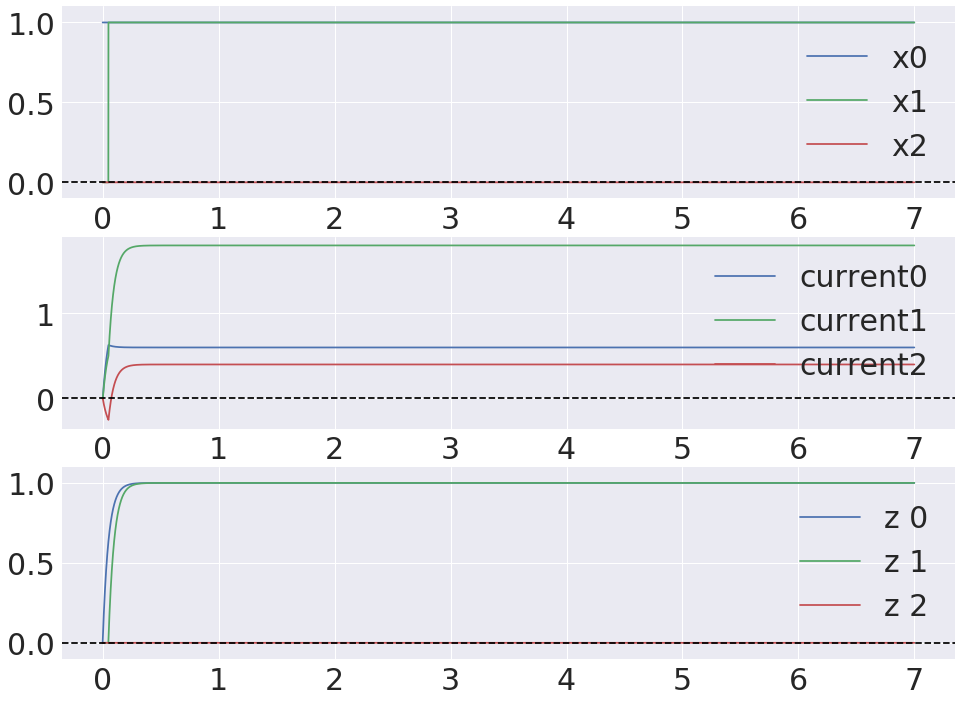

In [13]:
time = np.arange(0, T, dt)

x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend()

## Limit case when inhibition is way too big and the t2 transition time is very small.

#### Transition

In [59]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 3.0
transition = 0.5
inhibition = 50.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 20.0
I_cue = 0
T_cue = 0.100
dt = 0.001

pattern = 2
# transition_vector = np.arange(0.5, 0.7, 0.001)
transition_vector = np.logspace(-14, -0.3, 20) + 0.5
recall_times = []
for transition in transition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

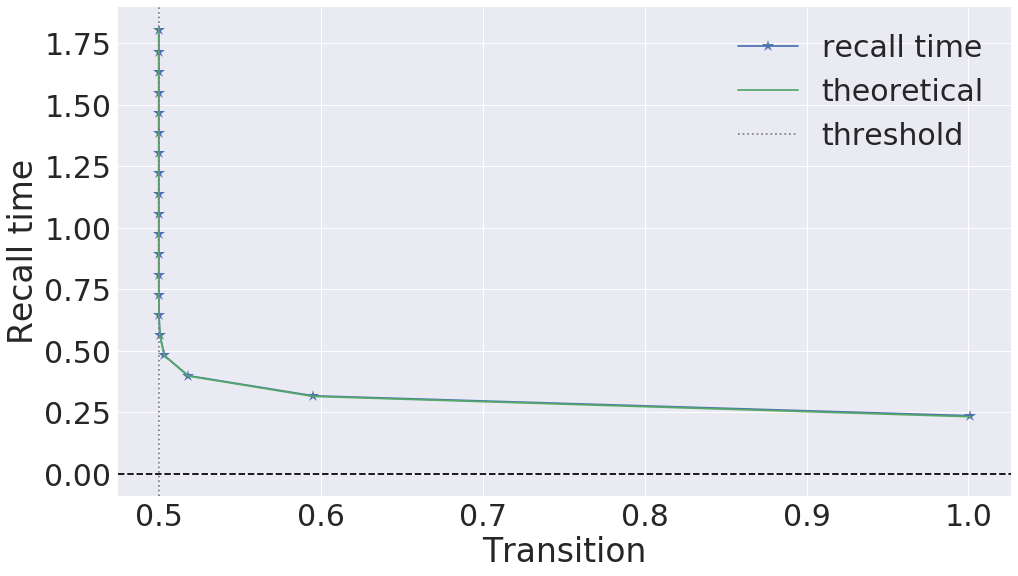

In [60]:
time_t1_recall = time_t1(tau_z, T=transition_vector, I=inhibition, threshold=threshold)

plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(transition_vector, time_t1_recall, label='theoretical')

plt.axhline(0, ls='--', color='black')
plt.axvline(threshold, ls=':', color='grey', label='threshold')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();

#### tau_z

In [57]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 50.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 15.0
I_cue = 0

dt = 0.001

pattern = 2
tau_z_vector = np.arange(0.050, 1.050, 0.050)
recall_times = []
for tau_z in tau_z_vector:
    T_cue = tau_z
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

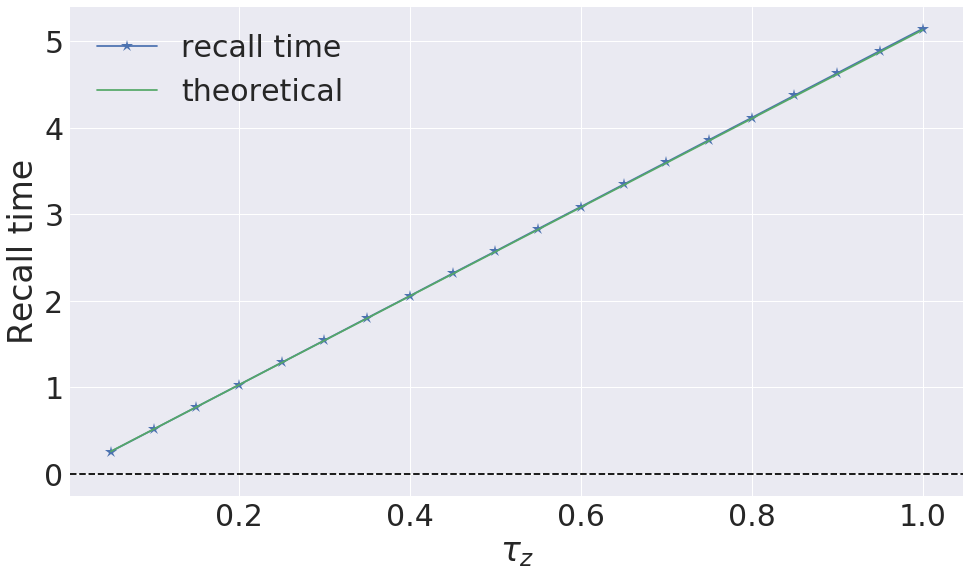

In [58]:
time_t1_recall = time_t1(tau_z_vector, T=transition, I=inhibition, threshold=threshold)

plt.plot(tau_z_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(tau_z_vector, time_t1_recall, label='theoretical')

plt.axhline(0, ls='--', color='black')

plt.xlabel(r'$\tau_{z}$')
plt.ylabel('Recall time')
plt.legend();

## Normal case 

#### Self-excitation

In [2]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 5.0
I_cue = 0
T_cue = 0.150
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 3
self_excitation_vector = np.arange(0.9, 2.4, 0.1)
# self_excitation_vector = 2.5 - np.logspace(-14, 0.2, 10)
recall_times = []
for self_excitation in self_excitation_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                                  inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']

    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)


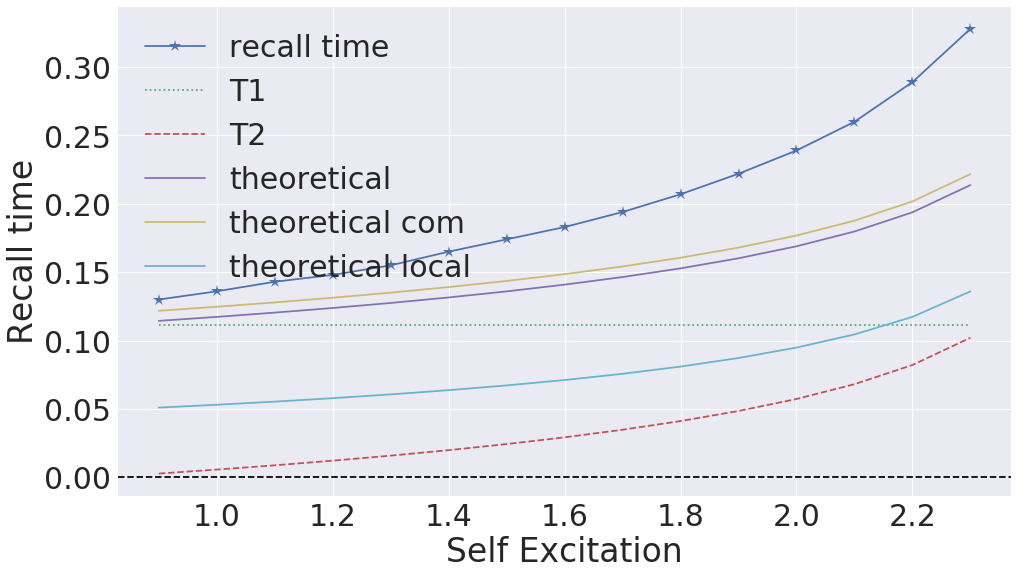

In [3]:
t1_recall = time_t1(tau_z, T=transition, I=inhibition, threshold=threshold)
t2_recall = time_t2(tau_z, A=self_excitation_vector, T=transition, I=inhibition, threshold=threshold)
t2_recall_complicated = time_t2_complicated(tau_z, A=self_excitation_vector, T=transition, I=inhibition, threshold=threshold)

t1_recall_local = time_t1_local(tau_z, T=transition, threshold=threshold)
t2_recall_local = time_t2_local(tau_z, A=self_excitation_vector, T=transition, I=inhibition, threshold=threshold)


plt.plot(self_excitation_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(self_excitation_vector, t1_recall * np.ones(t2_recall.size), ls=':', label='T1')
plt.plot(self_excitation_vector, t2_recall, ls='--', label='T2')
plt.plot(self_excitation_vector, t1_recall + t2_recall, label='theoretical');
plt.plot(self_excitation_vector, t1_recall + t2_recall_complicated, label='theoretical com');
plt.plot(self_excitation_vector, t1_recall_local + t2_recall_local, label='theoretical local')
plt.axhline(0, ls='--', color='black')

plt.xlabel('Self Excitation')
plt.ylabel('Recall time')
plt.legend();

#### Inhibition

In [8]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 6.0
I_cue = 0
T_cue = 0.150
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
inhibition_vector = np.arange(0.5, 2.0, 0.1)
# self_excitation_vector = 2.5 - np.logspace(-14, 0.2, 10)
recall_times = []
for self_excitation in inhibition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                                  inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']

    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

../analysis.py:46: RuntimeWarning: invalid value encountered in log
  return tau_z * np.log((A * B + I * B - I) / (A - (threshold + I)))
../analysis.py:59: RuntimeWarning: invalid value encountered in log
  return tau_z * np.log((A * B - I) / (A - (threshold + I)))


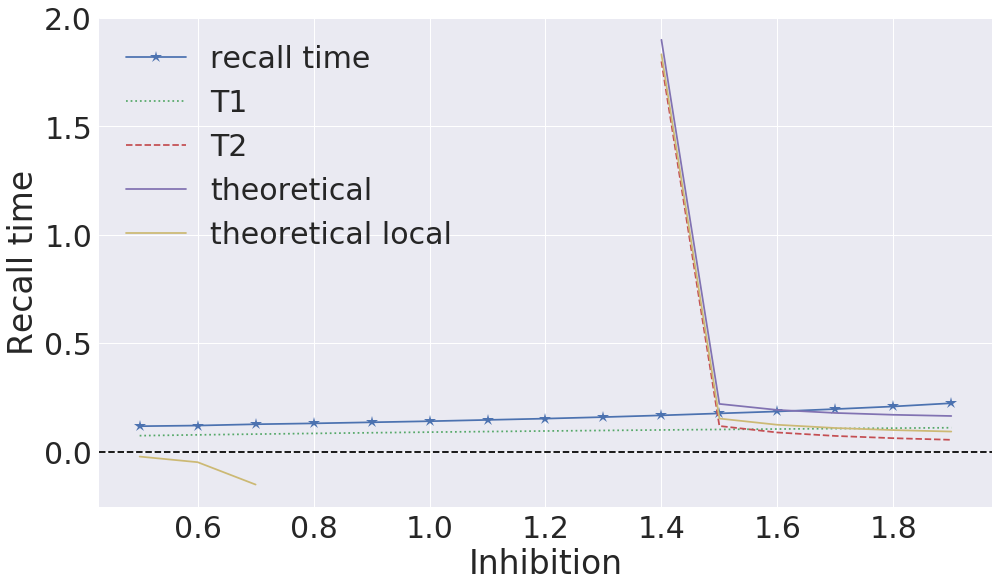

In [9]:
t1_recall = time_t1(tau_z, T=transition, I=inhibition_vector, threshold=threshold)
t2_recall = time_t2(tau_z, A=self_excitation, T=transition, I=inhibition_vector, threshold=threshold)

t1_recall_local = time_t1_local(tau_z, T=transition, threshold=threshold)
t2_recall_local = time_t2_local(tau_z, A=self_excitation, T=transition, I=inhibition_vector, threshold=threshold)


plt.plot(inhibition_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(inhibition_vector, t1_recall * np.ones(t2_recall.size), ls=':', label='T1')
plt.plot(inhibition_vector, t2_recall, ls='--', label='T2')
plt.plot(inhibition_vector, t1_recall + t2_recall, label='theoretical');
plt.plot(inhibition_vector, t1_recall_local + t2_recall_local, label='theoretical local')
plt.axhline(0, ls='--', color='black')

plt.xlabel('Inhibition')
plt.ylabel('Recall time')
plt.legend();

#### Transition

In [3]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 2.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 20.0
I_cue = 0
T_cue = 0.100
dt = 0.001

pattern = 2
# transition_vector = np.arange(0.5, 0.7, 0.001)
transition_vector = np.logspace(-14, -0.3, 20) + 0.5
recall_times = []
for transition in transition_vector:time_t1_recall = time_t1(tau_z, T=transition_vector, I=inhibition, threshold=threshold)

plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(transition_vector, time_t1_recall, label='theoretical')

plt.axhline(0, ls='--', color='black')
plt.axvline(threshold, ls=':', color='grey', label='threshold')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

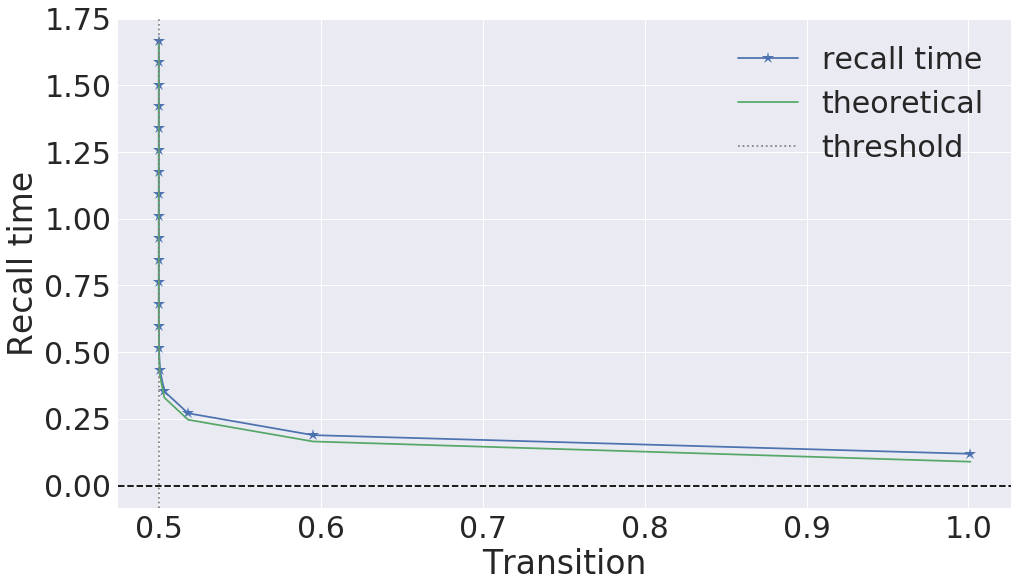

In [4]:
time_t1_recall = time_t1(tau_z, T=transition_vector, I=inhibition, threshold=threshold)

plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(transition_vector, time_t1_recall, label='theoretical')

plt.axhline(0, ls='--', color='black')
plt.axvline(threshold, ls=':', color='grey', label='threshold')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();

#### Tau_z

In [5]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.8
inhibition = 2.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 15.0
I_cue = 0

dt = 0.001

pattern = 2
tau_z_vector = np.arange(0.050, 1.050, 0.050)
recall_times = []
for tau_z in tau_z_vector:
    T_cue = tau_z
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)

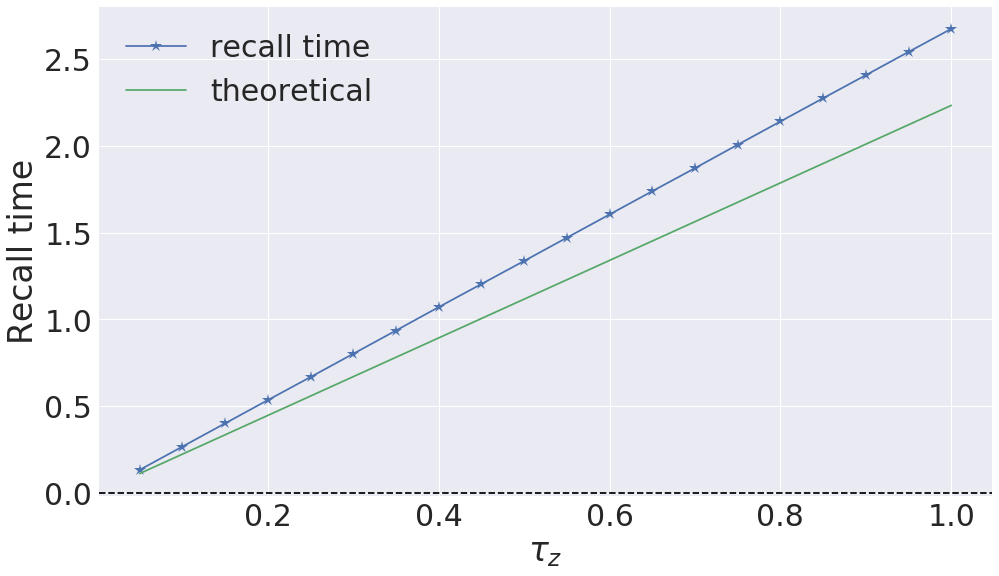

In [6]:
time_t1_recall = time_t1(tau_z_vector, T=transition, I=inhibition, threshold=threshold)

plt.plot(tau_z_vector, recall_times, '*-', markersize=13, label='recall time')
plt.plot(tau_z_vector, time_t1_recall, label='theoretical')

plt.axhline(0, ls='--', color='black')

plt.xlabel(r'$\tau_{z}$')
plt.ylabel('Recall time')
plt.legend();